## Market Segmentation 

The goal is to lunch a targeted ad marketing capaign by dividing bank's customers into distinctive groups. 

Marketers can help build the company's brand, engage customers, grow revenue and increase sales via growth, education, driving sales and engagement strategies. 

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Import dataset

creditcard_df = pd.read_csv('~/Documents/GitHub/real-application/data/bank_data.csv')
creditcard_df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
# Dataset information

creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Dataset summary

creditcard_df.describe()

# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
# One off purchase of $40761

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [6]:
# Max value for cash advance

creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [7]:
# Who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

<AxesSubplot:>

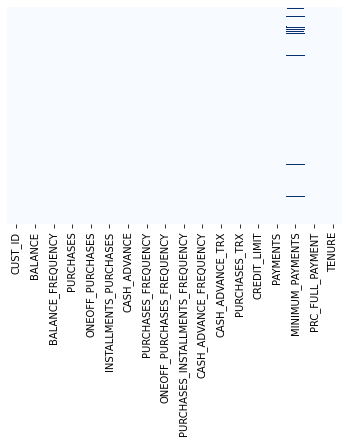

In [8]:
# Missing data if present 

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
# Summary of count of Nut null values 

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

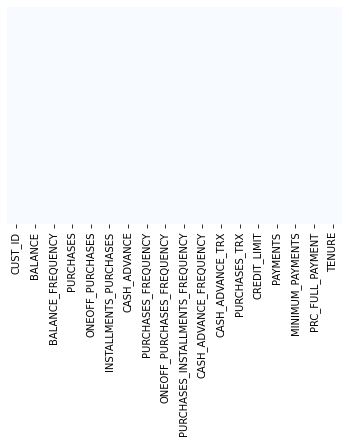

In [12]:
# Once again, missing value if present

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Duplicated entries in the data

creditcard_df.duplicated().sum()

0

In [14]:
# Drop Customer ID since it has no meaning 

creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [15]:
# Number of columns

n = len(creditcard_df.columns)
n

17

In [16]:
# Name of columns

creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

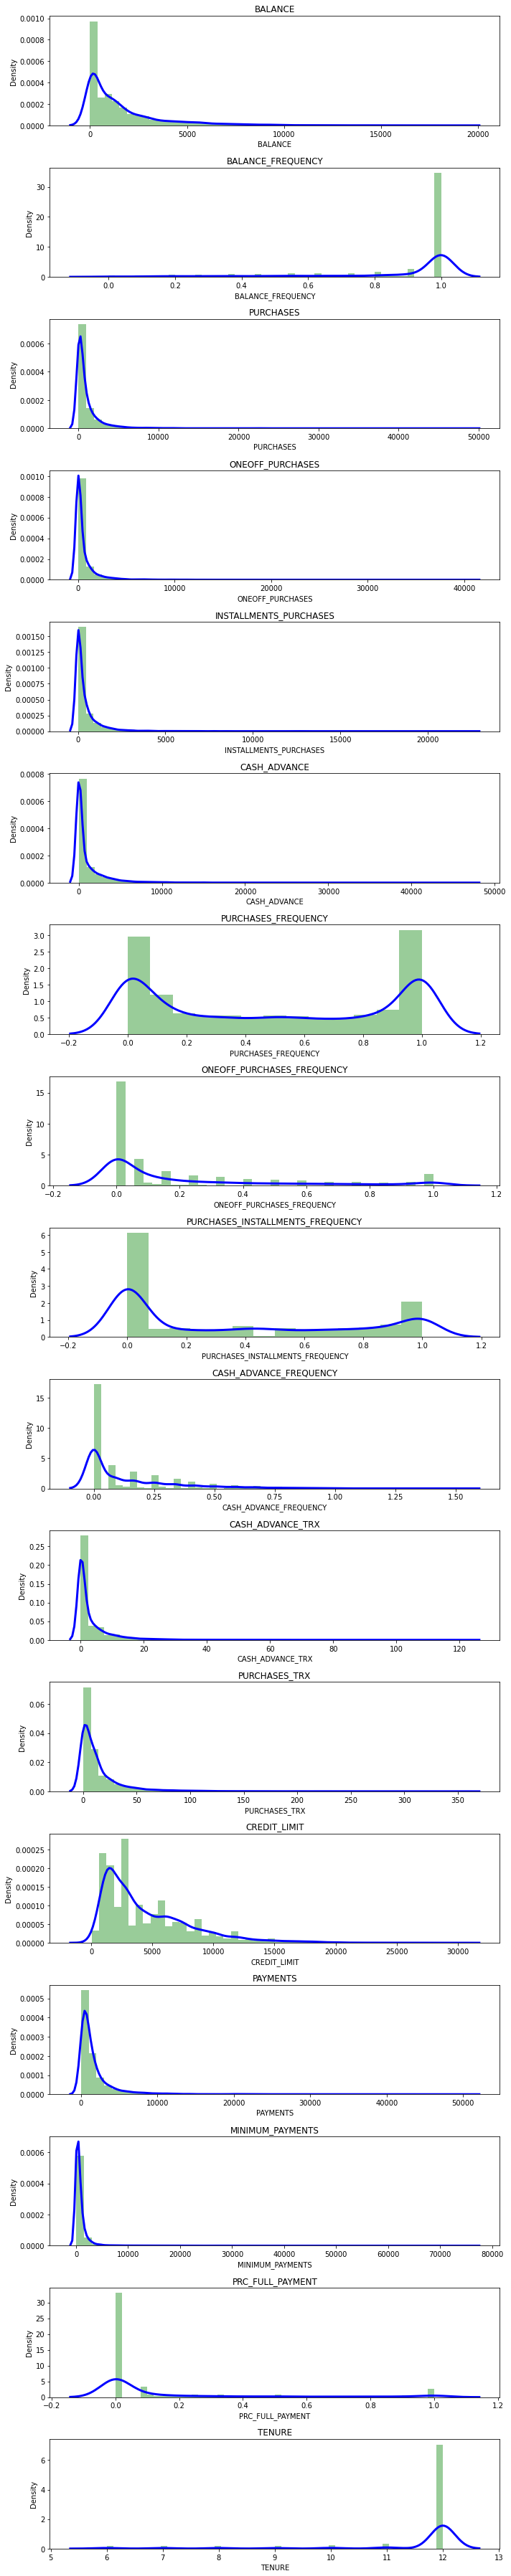

In [17]:
# Relationship plots for each column with displot & kdeplot 


# Distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

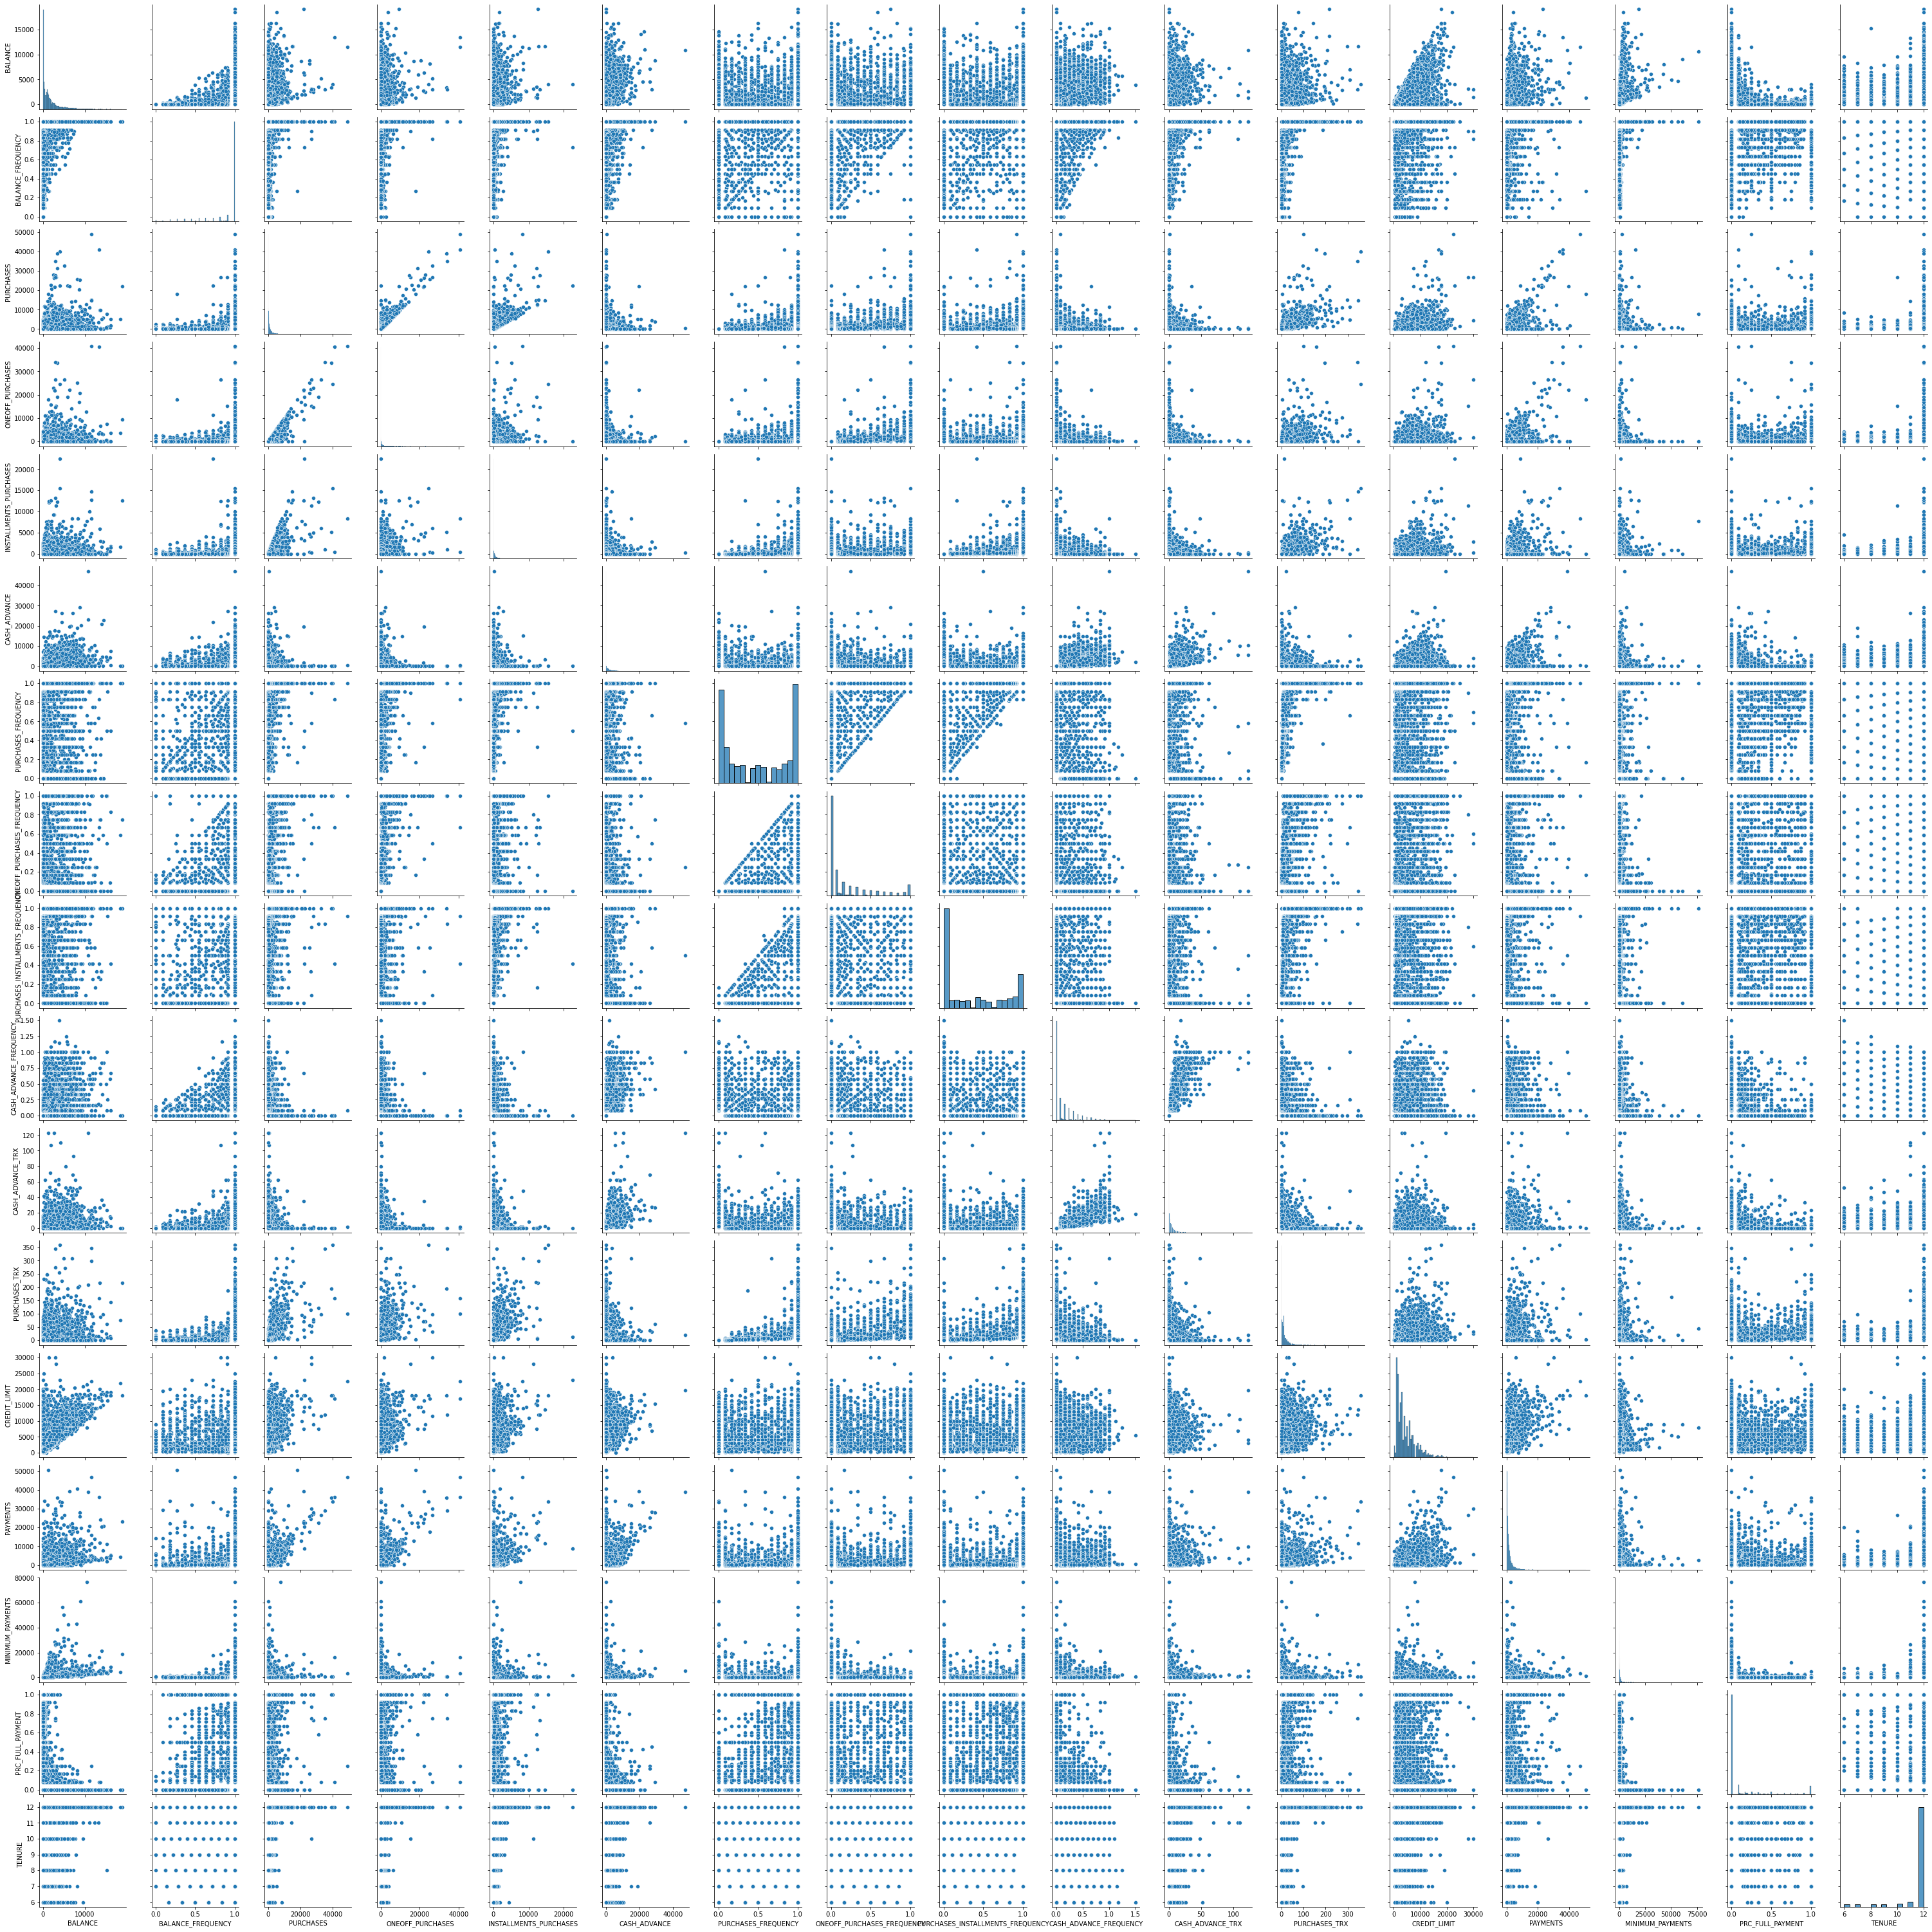

In [18]:
# Relationship between each column name with pairplot 

sns.pairplot(creditcard_df)

# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

<AxesSubplot:>

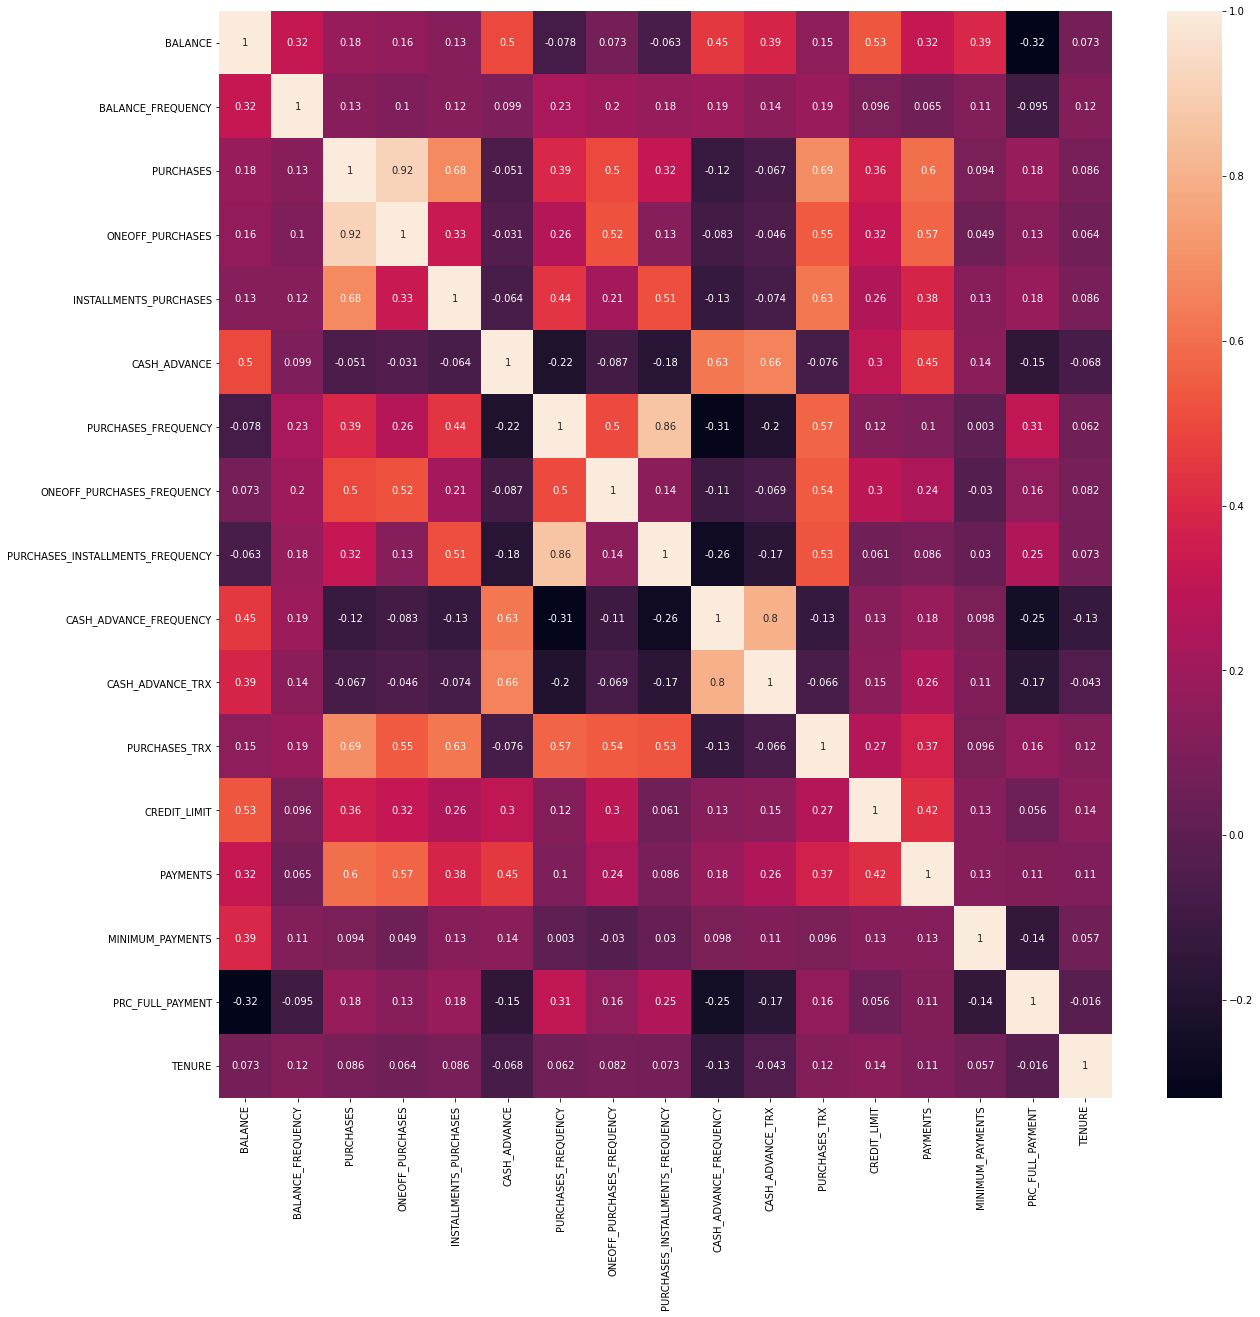

In [19]:
# Correlation plot 

correlations = creditcard_df.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

In [20]:
# Scaling (normalized) dataset

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [21]:
# Shape of dataset

creditcard_df_scaled.shape

(8950, 17)

In [22]:
# Dataset array

creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

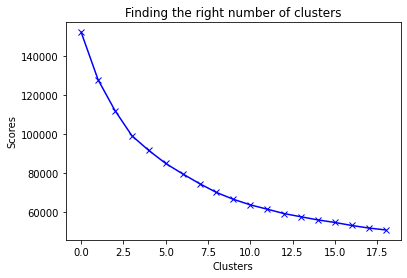

In [23]:
# Finding the right number of clusters

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# 4th cluster seems to be forming the elbow of the curve. However, the values does not reduce linearly until 8th cluster. Therefore, the number of clusters will be 7.

In [24]:
# K-Means method application with 8 clusters

kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [25]:
# K-Means method shape

kmeans.cluster_centers_.shape

(8, 17)

In [26]:
# Create cluster's center

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.336893         -0.351916  -0.288199        -0.214424   
1 -0.359358          0.334478  -0.034427        -0.241365   
2  1.691034          0.392594  -0.216412        -0.154711   
3 -0.701257         -2.137189  -0.310069        -0.234784   
4  1.044069          0.464401   2.531970         1.837424   
5  0.013635          0.403877  -0.357398        -0.241788   
6  1.865907          0.332878  12.596844        13.111182   
7 -0.132850          0.400737   0.544152         0.673479   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.287144     0.067274           -0.203348   
1               0.361834    -0.363233            0.990501   
2              -0.227541     2.012305           -0.469098   
3              -0.301700    -0.322766           -0.553110   
4               2.611177    -0.141149            1.163601   
5              -0.400744    -0.092195           -0.854977   
6               5.696389    -0.004178            1.033322   
7               0.049157    -0.330997            0.982274   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.286554                        -0.225256   
1                  -0.380815                         1.201819   
2                  -0.207299                        -0.409609   
3                  -0.441424                        -0.438831   
4                   1.571795                         1.270158   
5                  -0.394736                        -0.756724   
6                   2.170634                         0.866221   
7                   1.908927                         0.173615   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.306510        -0.000298     -0.387867    -0.563134   
1              -0.473312        -0.360243      0.191009    -0.257129   
2               1.913371         1.921561     -0.264674     1.034345   
3              -0.521893        -0.376564     -0.418536    -0.176209   
4              -0.280397        -0.142502      3.142724     1.310056   
5               0.106608        -0.025805     -0.482294    -0.304706   
6              -0.476183        -0.214854      4.566558     3.174197   
7              -0.412410        -0.329665      0.623800     0.434561   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.393094        -0.208930         0.013378 -3.201889  
1 -0.214873        -0.030793         0.306598  0.256773  
2  0.821723         0.554316        -0.390071  0.070372  
3 -0.202135        -0.257092         0.287615  0.201638  
4  1.477173         0.564717         0.264636  0.337262  
5 -0.248756        -0.011229        -0.455172  0.273184  
6  8.991136         1.064817         1.236317  0.295702  
7  0.146674        -0.157916         0.445622  0.268609

In [27]:
# Inverse transformation to understand cluster_centers column numbers

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (Revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (Low tenure): these are customers with low tenure (7 years), low balance 


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   863.259693          0.793905    387.463654       236.537740   
1   816.501707          0.956505    929.650828       191.821504   
2  5084.220159          0.970273    540.836529       335.648115   
3   104.867851          0.370990    340.737061       202.743395   
4  3737.616647          0.987283   6412.797493      3642.184387   
5  1592.854379          0.972945    239.618793       191.118498   
6  5448.201718          0.956126  27916.555652     22354.314348   
7  1287.958481          0.972202   2165.793946      1710.274152   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             151.406683  1119.947453            0.408737   
1             738.269798   217.154309            0.887886   
2             205.305276  5198.769457            0.302079   
3             138.244341   302.015981            0.268361   
4            2772.322507   682.876054            0.957360   
5              48.680251   785.533274            0.147207   
6            5562.241304   970.110470            0.905072   
7             455.519795   284.754838            0.884585   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.116973                         0.274915   
1                   0.088853                         0.842071   
2                   0.140616                         0.201648   
3                   0.070772                         0.190035   
4                   0.671355                         0.869231   
5                   0.084700                         0.063696   
6                   0.850000                         0.708696   
7                   0.771928                         0.433436   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.196480         3.246795      5.068910   2445.535977   
1               0.040430         0.790434     19.457594   3558.910356   
2               0.518029        16.362069      8.131034   8257.821317   
3               0.030708         0.679054      4.306588   3853.327233   
4               0.079034         2.276353     92.826211   9260.968661   
5               0.156478         3.072727      2.721818   3385.806061   
6               0.039855         1.782609    128.217391  16043.478261   
7               0.052617         0.999107     30.215179   6075.560065   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    595.176112       377.303465         0.157627   7.232372  
1   1111.108495       792.445554         0.243389  11.860947  
2   4111.952429      2156.015590         0.039626  11.611494  
3   1147.983995       265.065556         0.237837  11.787162  
4   6009.414573      2180.256092         0.231116  11.968661  
5   1013.019753       838.038962         0.020585  11.882909  
6  27761.600386      3345.718254         0.515316  11.913043  
7   2157.752006       496.189172         0.284051  11.876786

In [28]:
# Number of labels associated to each data point

labels.shape 

(8950,)

In [29]:
# Max cluster

labels.max()

7

In [30]:
# Min cluster 

labels.min()

0

In [31]:
# K-Means method prediction

y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([1, 0, 3, ..., 2, 2, 2], dtype=int32)

In [32]:
# Concatenation of clusters labels to original dataframe with new column 'cluster'

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        5  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        7  
3     0.000000        864.206542          0.000000      12        5  
4   678.334763        244.791237          0.000000      12        5

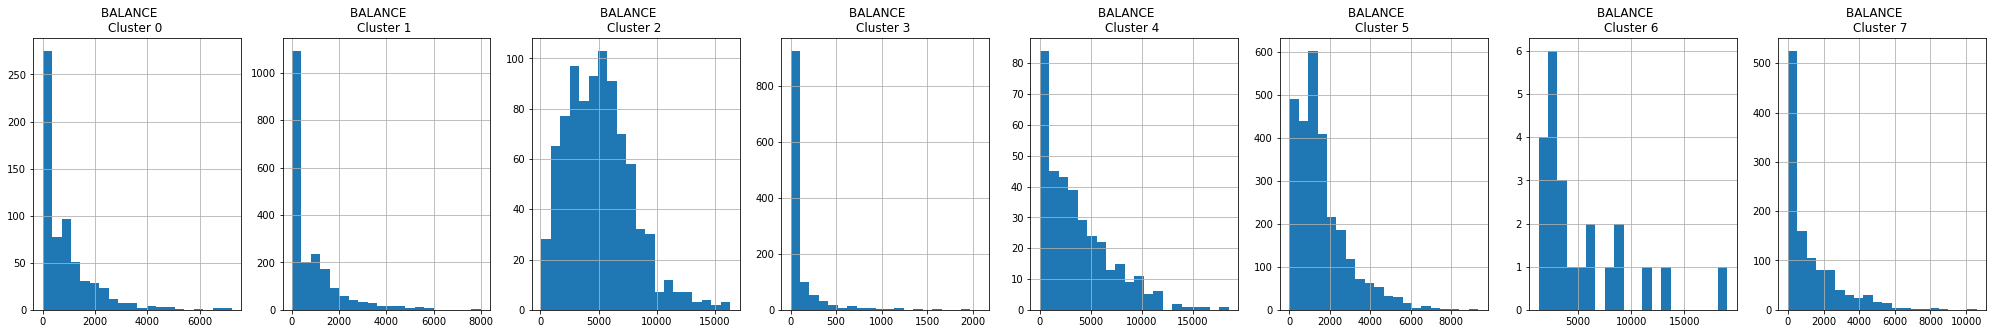

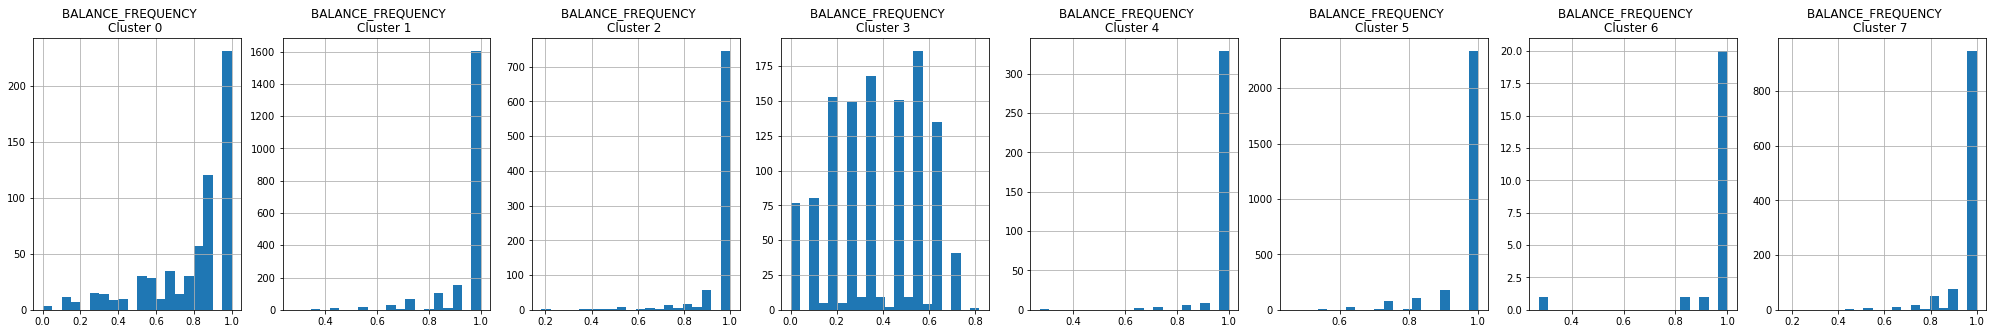

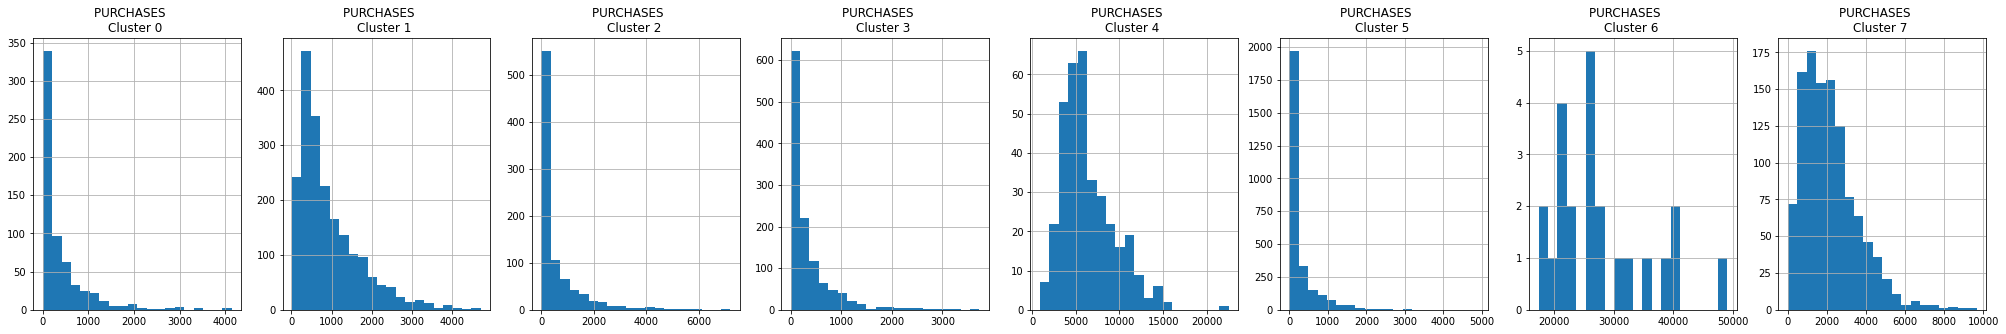

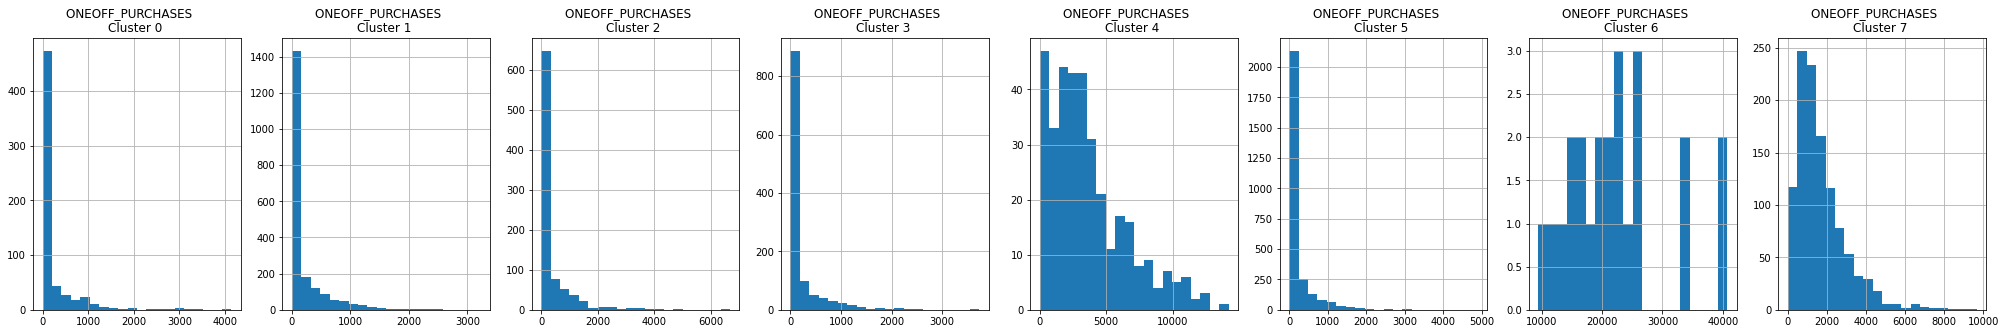

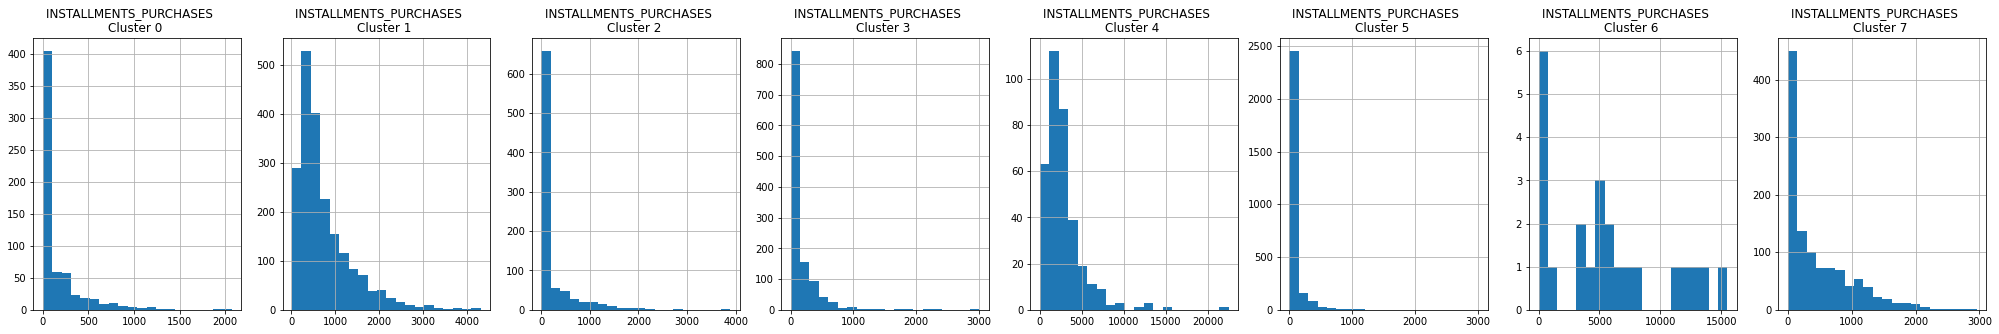

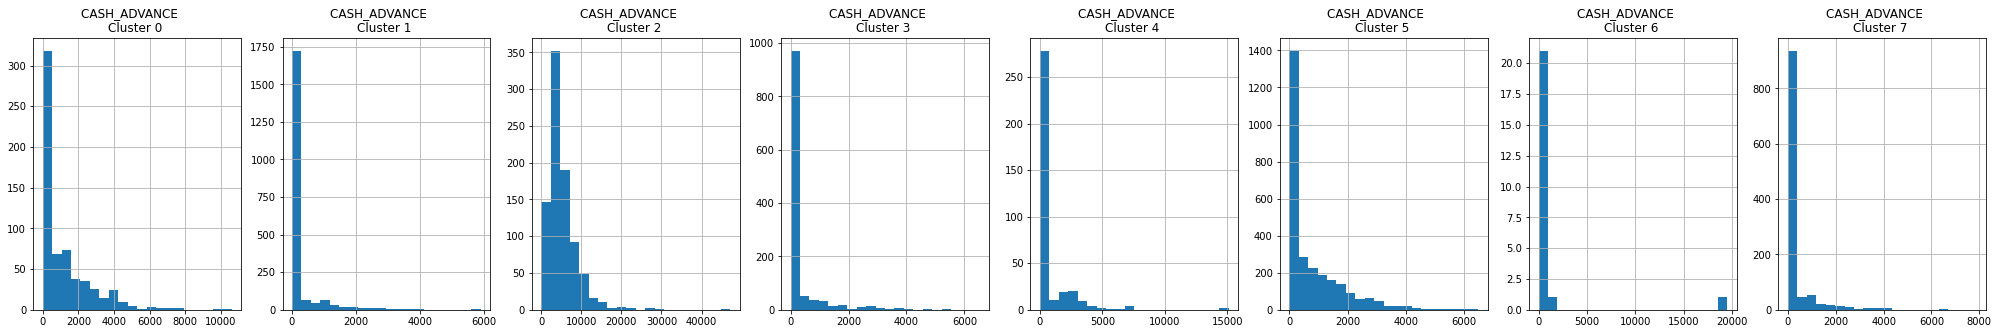

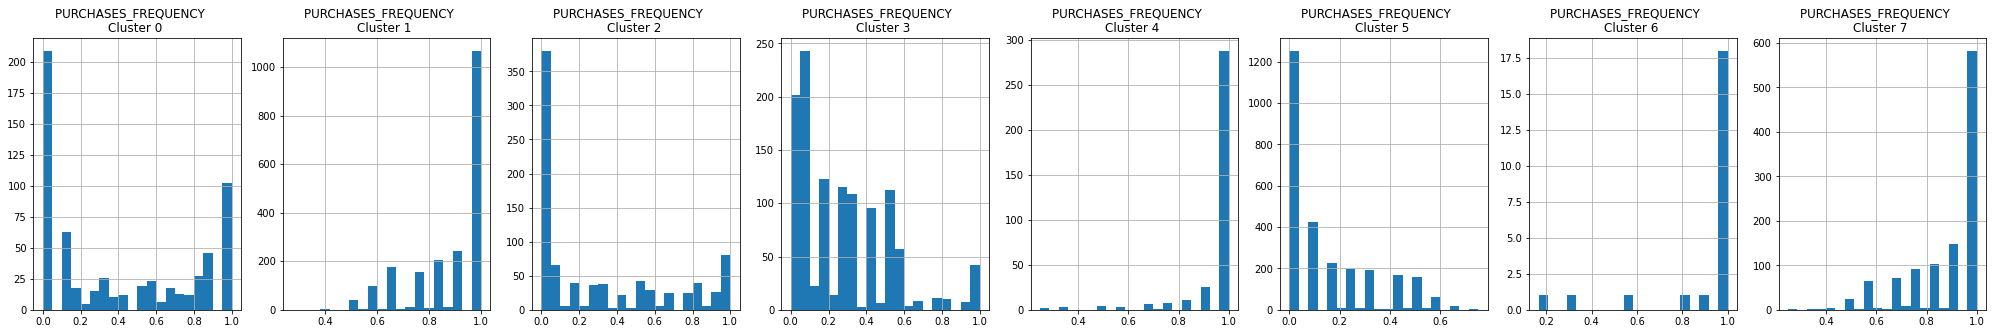

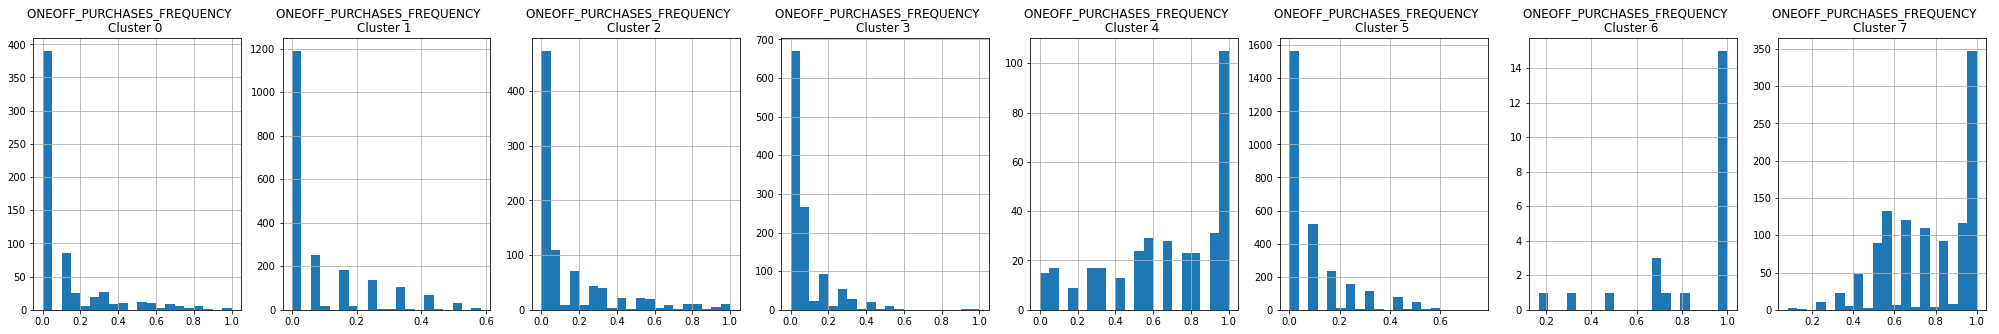

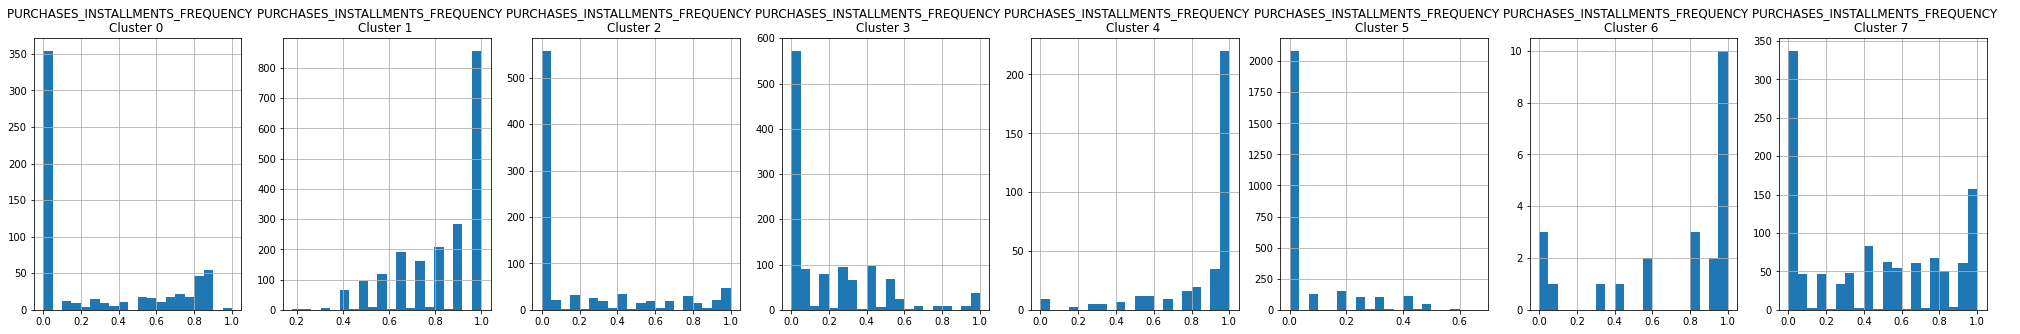

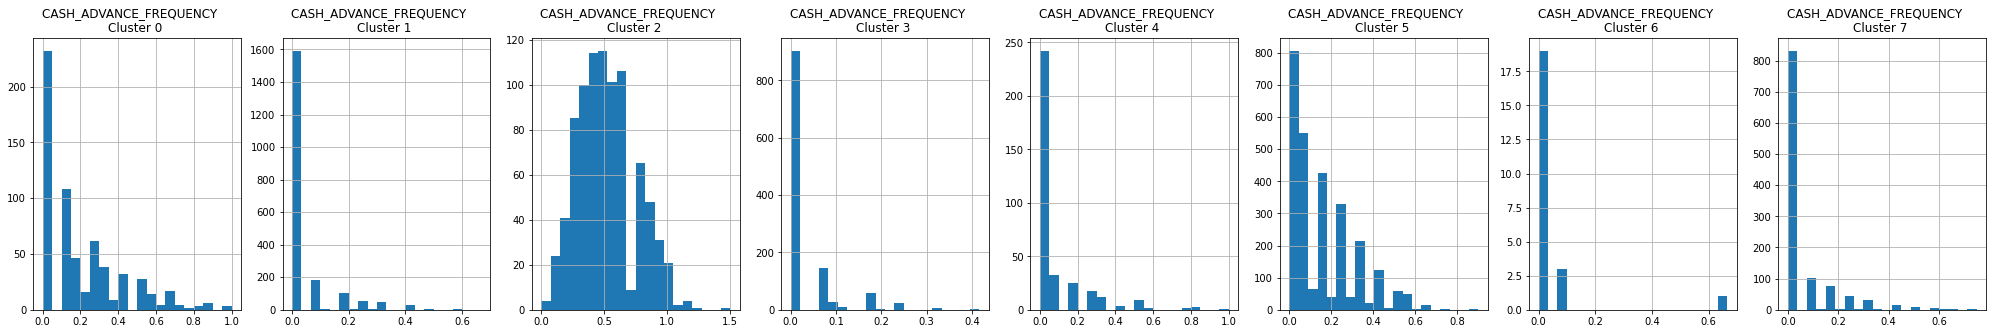

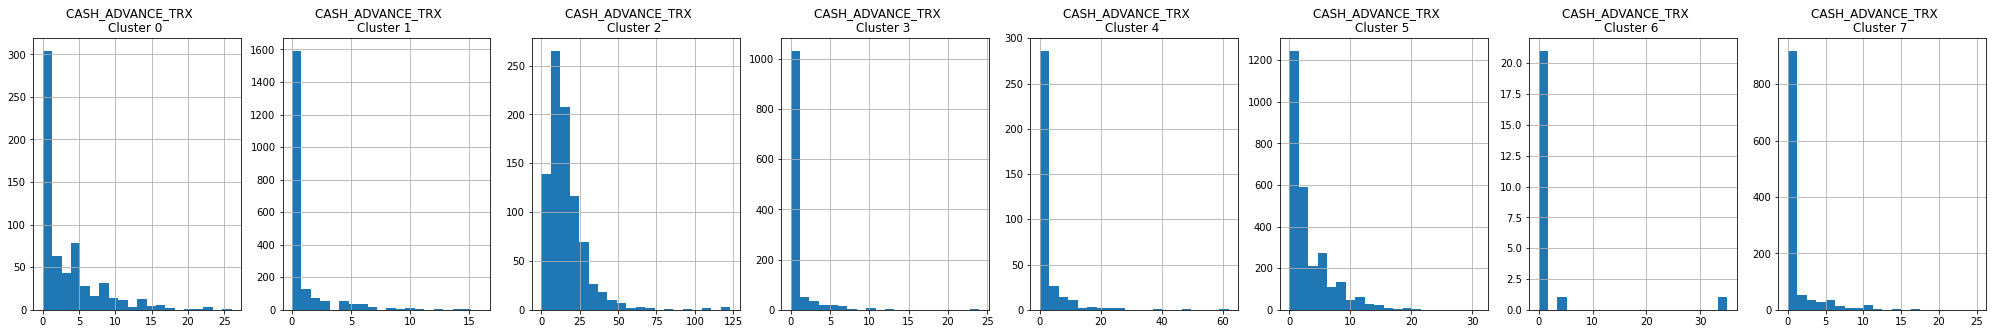

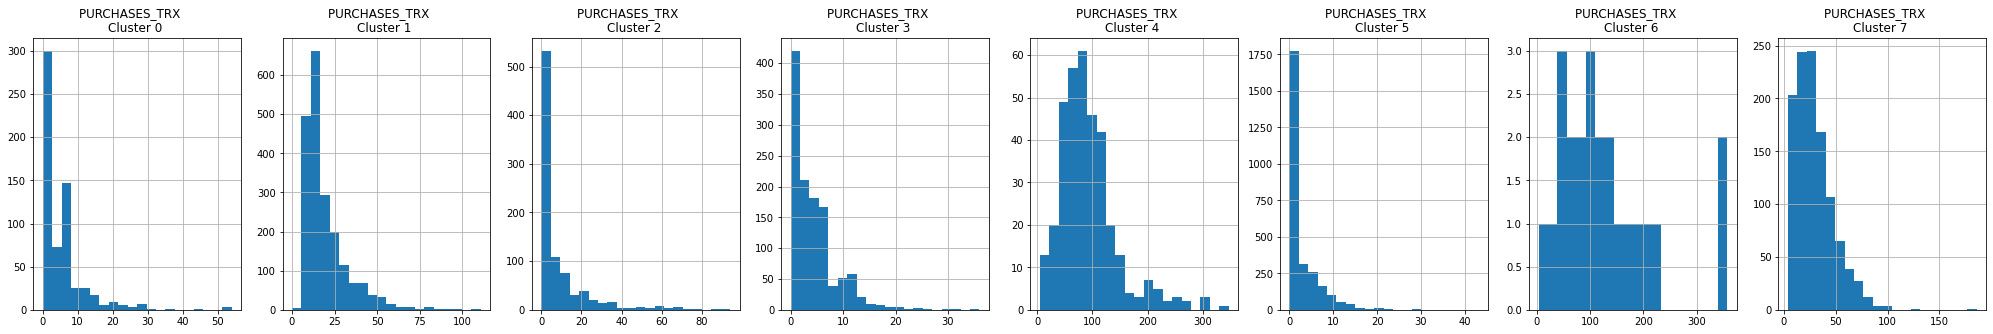

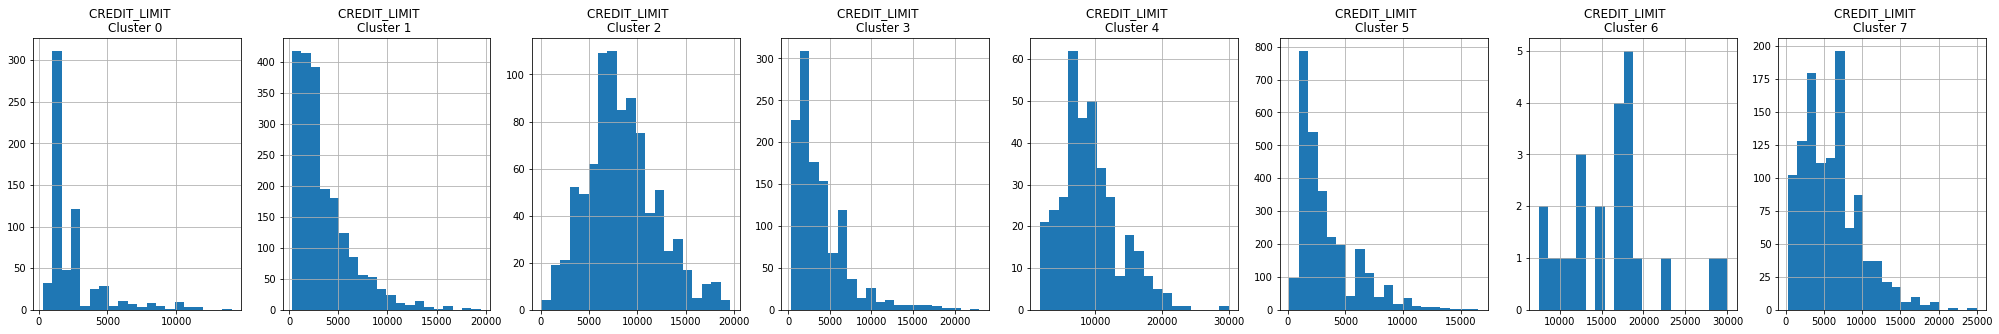

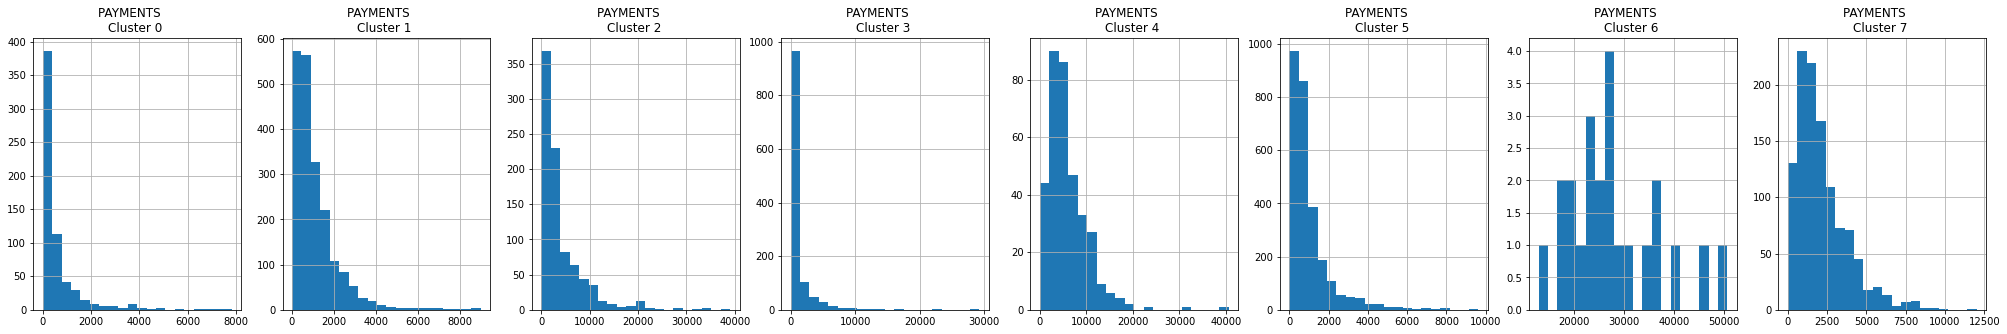

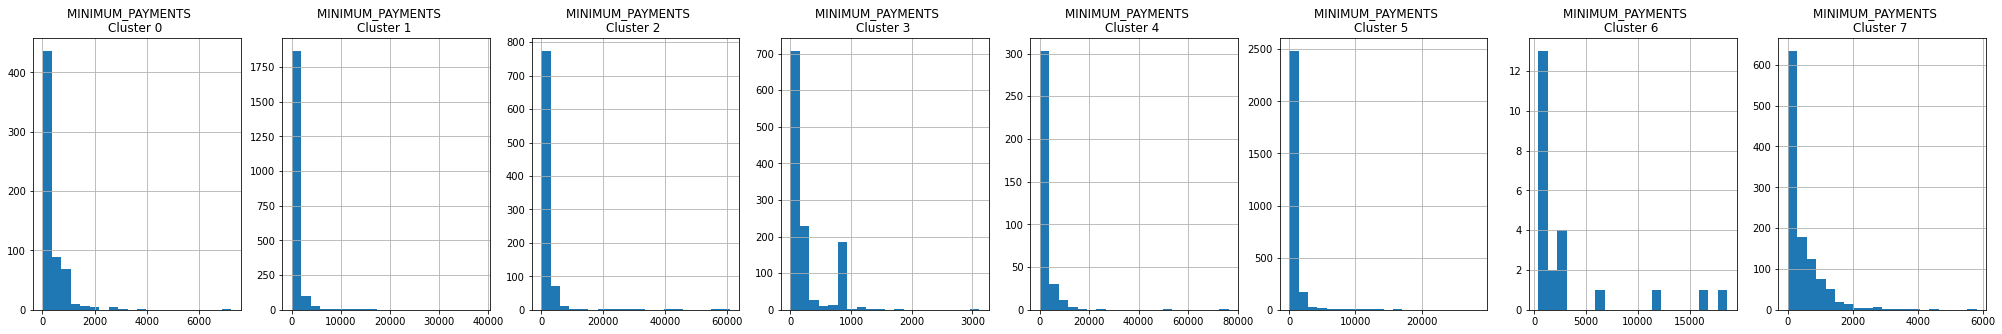

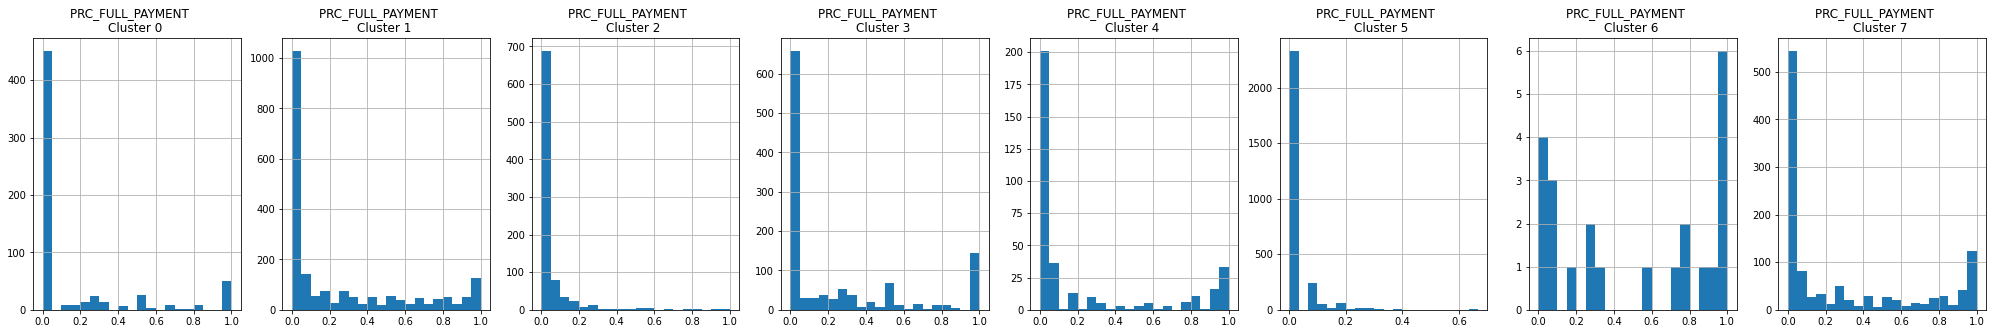

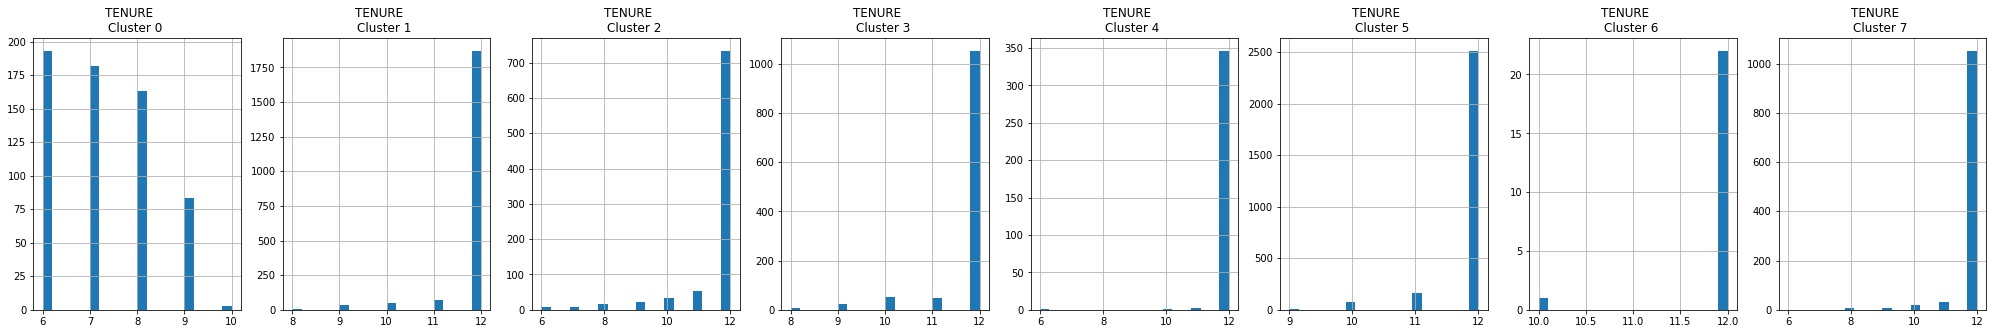

In [33]:
# Plot the histogram of various clusters

for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [34]:
# Obtain the principal components 

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221962, -1.07645192],
       [-1.13829101,  2.50646574],
       [ 0.96967381, -0.38350218],
       ...,
       [-0.92620336, -1.81078413],
       [-2.33654825, -0.65797038],
       [-0.55642409, -0.40046393]])

In [35]:
# Create a dataframe with the two components

pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076452
1 -1.138291  2.506466
2  0.969674 -0.383502
3 -0.873630  0.043167
4 -1.599432 -0.688582

In [36]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076452        5
1 -1.138291  2.506466        2
2  0.969674 -0.383502        7
3 -0.873630  0.043167        5
4 -1.599432 -0.688582        5

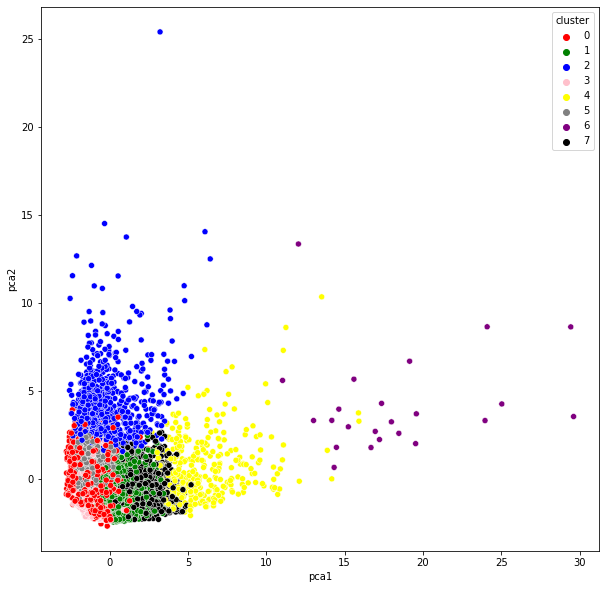

In [37]:
# Plot 8 clusters

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [38]:
# Apply dimensionality reduction with Autoencoders

# Build the model

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder - used for dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [39]:
# Dataset shape

creditcard_df_scaled.shape

(8950, 17)

In [40]:
# Training autoencoder 

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 44ms/step - loss: 0.7487
Epoch 2/25
70/70 [==============================] - 2s 34ms/step - loss: 0.5163
Epoch 3/25
70/70 [==============================] - 2s 34ms/step - loss: 0.4417
Epoch 4/25
70/70 [==============================] - 3s 37ms/step - loss: 0.4110
Epoch 5/25
70/70 [==============================] - 3s 43ms/step - loss: 0.3935
Epoch 6/25
70/70 [==============================] - 2s 35ms/step - loss: 0.3862
Epoch 7/25
70/70 [==============================] - 3s 39ms/step - loss: 0.3695
Epoch 8/25
70/70 [==============================] - 4s 56ms/step - loss: 0.3336
Epoch 9/25
70/70 [==============================] - 4s 51ms/step - loss: 0.3171
Epoch 10/25
70/70 [==============================] - 4s 59ms/step - loss: 0.3093
Epoch 11/25
70/70 [==============================] - 6s 80ms/step - loss: 0.2972
Epoch 12/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2897
Epoch 13/25
70/70 [==================

In [41]:
# Autoencoder summary model

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [42]:
# Save autoencoder

autoencoder.save_weights('autoencoder.h5')

In [43]:
# Prediction

pred = encoder.predict(creditcard_df_scaled)

In [44]:
# Shape of pred autoencoder with 10 features only 

pred.shape

(8950, 10)

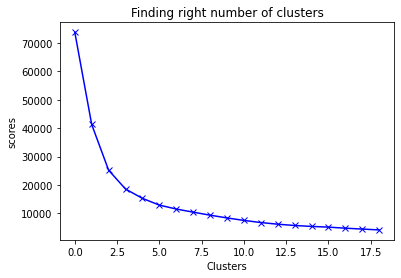

In [45]:
# Finding the right number of clusters

scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

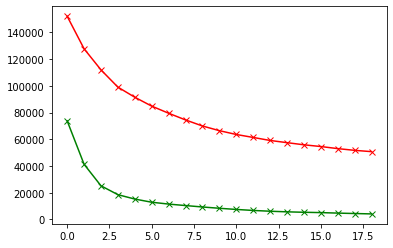

In [46]:
# The elbow method, comparing score_1 vs score_2 (K-Means vs Autoencoder) 

plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [47]:
# K-Means reapplied for 4 clusters

kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [48]:
# Dataframe with only 4 clusters column at the end 

df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [49]:
# Apply PCA for pred with autoencoders 

pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.109530  0.172609
1 -1.344933  0.502956
2 -0.593203 -0.356061
3 -1.758872  0.010421
4 -1.493590  0.117540

In [50]:
# Concatenate to dataframe 

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.109530  0.172609        0
1 -1.344933  0.502956        0
2 -0.593203 -0.356061        0
3 -1.758872  0.010421        0
4 -1.493590  0.117540        0

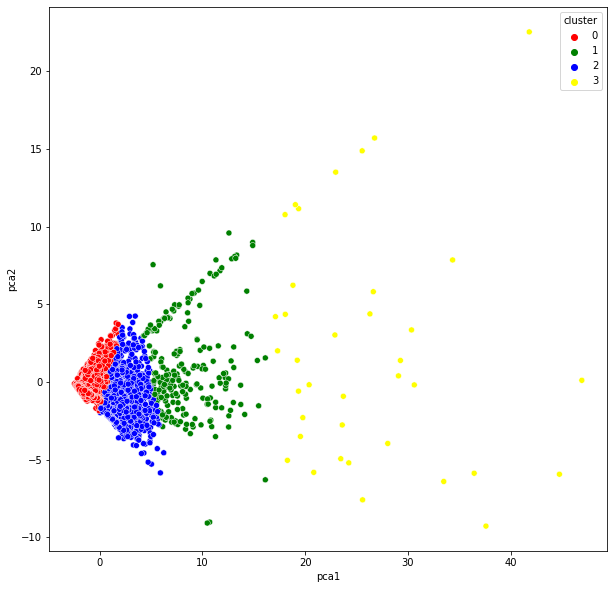

In [51]:
# PCA plot for only 4 clusters 

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()